In [ ]:
pip install opencv-python==4.4.0.46 opencv-contrib-python==4.4.0.40

     |████████████████████████████████| 49.5MB 65kB/s 
     |████████████████████████████████| 55.6MB 58kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
file_id="1qAD7StpMovQM2u8g6kgf9CysYs-vZ-P-"
!gdown https://drive.google.com/uc?id={file_id}



!unzip -q datasetProjetS5_2020.zip

Downloading...
From: https://drive.google.com/uc?id=1qAD7StpMovQM2u8g6kgf9CysYs-vZ-P-
To: /content/datasetProjetS5_2020.zip
864MB [00:07, 109MB/s]


In [ ]:
!rm -rf /content/datasetProjetS5_2020/test/Background_without_leaves
!rm -rf /content/datasetProjetS5_2020/train/Background_without_leaves
!rm -rf /content/datasetProjetS5_2020/valid/Background_without_leaves

In [ ]:
from keras.layers.core import Flatten, Dense, Dropout, Reshape
from keras.models import Model
from keras.layers import Input, ZeroPadding2D, Dropout
from keras import optimizers
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from keras.applications.vgg16 import VGG16

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

import matplotlib.pyplot as plt

import cv2
import os
import numpy as np


In [ ]:
def getTargets(dataType,nbreClass):
  #------mettre les noms des classes dans target------#
  target = os.listdir('datasetProjetS5_2020/'+dataType)
  target.sort()
  #------on prend qu'un exemplaire de classes----#
  target_sample=[0]*nbreClass
  for i in range(nbreClass):
    target_sample[i]=target[i]
  #--------- retourne exemplaire de classes----#
  return target_sample

def getNameByNum(num):
    targets=getTargets("train",38)
    return targets[num]


In [ ]:
from tensorflow.keras.applications import vgg16
image_size=256
# Init the VGG model 
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False,
                       input_shape=(image_size, image_size, 3))
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(38, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

58892288/58889256 [==============================] - 0s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7ff9d2aed668> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff9c7af18d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff9c723a668> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff9c726aef0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff9c726ccf8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff9c726a400> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff9c7276e80> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff9b01bdfd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff9b01c7d68> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7ff9b01bd550> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7ff9b01cdb70> Fals

In [ ]:
# Load the normalized images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        "/content/datasetProjetS5_2020/train",
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        "/content/datasetProjetS5_2020/test",
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 35249 images belonging to 38 classes.
Found 10770 images belonging to 38 classes.


In [ ]:
# Configure the model for training
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=
         train_generator.samples/train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=
         validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/20
352/352 [==============================] - 284s 778ms/step - loss: 1.5946 - acc: 0.6072 - val_loss: 0.3712 - val_acc: 0.8804
Epoch 2/20
352/352 [==============================] - 271s 770ms/step - loss: 0.3734 - acc: 0.8843 - val_loss: 0.2039 - val_acc: 0.9378
Epoch 3/20
352/352 [==============================] - 271s 769ms/step - loss: 0.2351 - acc: 0.9247 - val_loss: 0.1872 - val_acc: 0.9405
Epoch 4/20
352/352 [==============================] - 271s 769ms/step - loss: 0.1673 - acc: 0.9472 - val_loss: 0.1762 - val_acc: 0.9407
Epoch 5/20
352/352 [==============================] - 271s 768ms/step - loss: 0.1303 - acc: 0.9566 - val_loss: 0.1531 - val_acc: 0.9508
Epoch 6/20
352/352 [==============================] - 271s 768ms/step - loss: 0.1081 - acc: 0.9643 - val_loss: 0.1226 - val_acc: 0.9607
Epoch 7/20
352/352 [==============================] - 271s 769ms/step - loss: 0.0889 - acc: 0.9708 - val_loss: 0.1238 - val_acc: 0.9590
Epoch 8/20
352/352 [============================

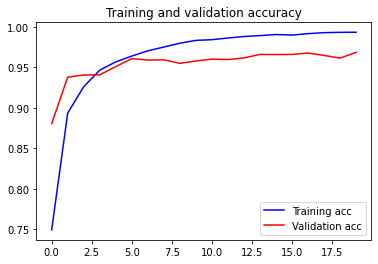

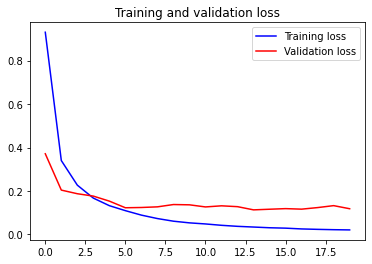

In [ ]:
# Utility function for plotting of the model results
def visualize_results(history):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()


# Run the function to illustrate accuracy and loss
visualize_results(history)

In [ ]:
model.save('MyVggModel.h5')

In [ ]:
model = tf.keras.models.load_model(
    "/content/drive/MyDrive/Colab Notebooks/MyVggModel .h5", custom_objects=None, compile=True, options=None
)

In [ ]:

def recognizeImage(image_path):
  image = tf.keras.preprocessing.image.load_img(image_path)
  input_arr = keras.preprocessing.image.img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  arr=model.predict(input_arr)[0]
  maxElement = np.amax(arr)
  result = np.where(arr == maxElement)
  result = getNameByNum(result[0][0])
  print(result)


recognizeImage("/content/datasetProjetS5_2020/valid/Grape___healthy/image (277).JPG")
recognizeImage("/content/datasetProjetS5_2020/valid/Orange___Haunglongbing_(Citrus_greening)/image (3608).JPG")
recognizeImage("/content/datasetProjetS5_2020/valid/Grape___Black_rot/image (758).JPG")
recognizeImage("/content/datasetProjetS5_2020/valid/Apple___healthy/image (1056).JPG")
recognizeImage("/content/datasetProjetS5_2020/valid/Corn___Northern_Leaf_Blight/image (633).jpg")
recognizeImage("/content/datasetProjetS5_2020/valid/Corn___Common_rust/image (769).JPG")
recognizeImage("/content/datasetProjetS5_2020/valid/Tomato___Spider_mites Two-spotted_spider_mite/image (1080).JPG")
recognizeImage("/content/datasetProjetS5_2020/valid/Tomato___Leaf_Mold/image (612).JPG")
recognizeImage("/content/datasetProjetS5_2020/valid/Tomato___Spider_mites Two-spotted_spider_mite/image (1077).JPG")

Grape___healthy
Blueberry___healthy
Grape___Black_rot
Apple___Black_rot
Corn___healthy
Corn___Common_rust
Tomato___Septoria_leaf_spot
Tomato___Septoria_leaf_spot
Tomato___Septoria_leaf_spot
